In [1]:
#libraries 
import pandas as pd 
import numpy as np
#Functools module is for higher-order functions: functions that act on or return other functions.
#In general , any callable object can be treated as a function for the purposes of this module. 
from functools import reduce 
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#read data into dataframes 

df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nslkdd-version1.csv') 
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/nslkdd-version2.csv')


In [3]:
#display first 15 rows of each dataset 
df1.head(15)

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,neptune
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune


In [5]:
df2.head(15)

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
0,0,0,0,0,0,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,0,0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,0,0,0,0,0,1,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,0,0,0,0,0,1,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
5,0,0,0,0,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
6,0,0,0,0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
7,0,0,0,0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,1
8,0,0,0,0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
9,0,0,0,0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


In [6]:
#check shape of each dataset 
df1.shape

(25192, 42)

In [7]:
df2.shape

(25192, 36)

Version 1 data set has more columns than version 2 data set. Both datasets have 25,192 observations. 

In [8]:
#check for null values each dataset 
df1.isnull().sum()

a1     0
a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [9]:
df2.isnull().sum()

a7     0
a8     0
a9     0
a10    0
a11    0
a12    0
a13    0
a14    0
a15    0
a16    0
a17    0
a18    0
a19    0
a20    0
a21    0
a22    0
a23    0
a24    0
a25    0
a26    0
a27    0
a28    0
a29    0
a30    0
a31    0
a32    0
a33    0
a34    0
a35    0
a36    0
a37    0
a38    0
a39    0
a40    0
a41    0
a42    0
dtype: int64

In [10]:
#look at structure of dataframes 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a1      25192 non-null  int64  
 1   a2      25192 non-null  object 
 2   a3      25192 non-null  object 
 3   a4      25192 non-null  object 
 4   a5      25192 non-null  int64  
 5   a6      25192 non-null  int64  
 6   a7      25192 non-null  int64  
 7   a8      25192 non-null  int64  
 8   a9      25192 non-null  int64  
 9   a10     25192 non-null  int64  
 10  a11     25192 non-null  int64  
 11  a12     25192 non-null  int64  
 12  a13     25192 non-null  int64  
 13  a14     25192 non-null  int64  
 14  a15     25192 non-null  int64  
 15  a16     25192 non-null  int64  
 16  a17     25192 non-null  int64  
 17  a18     25192 non-null  int64  
 18  a19     25192 non-null  int64  
 19  a20     25192 non-null  int64  
 20  a21     25192 non-null  int64  
 21  a22     25192 non-null  int64  
 22

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 36 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a7      25192 non-null  int64  
 1   a8      25192 non-null  int64  
 2   a9      25192 non-null  int64  
 3   a10     25192 non-null  int64  
 4   a11     25192 non-null  int64  
 5   a12     25192 non-null  int64  
 6   a13     25192 non-null  int64  
 7   a14     25192 non-null  int64  
 8   a15     25192 non-null  int64  
 9   a16     25192 non-null  int64  
 10  a17     25192 non-null  int64  
 11  a18     25192 non-null  int64  
 12  a19     25192 non-null  int64  
 13  a20     25192 non-null  int64  
 14  a21     25192 non-null  int64  
 15  a22     25192 non-null  int64  
 16  a23     25192 non-null  int64  
 17  a24     25192 non-null  int64  
 18  a25     25192 non-null  float64
 19  a26     25192 non-null  float64
 20  a27     25192 non-null  float64
 21  a28     25192 non-null  float64
 22

The first dataset has object data types in the columns and the second dataset only has float or int data types. The second data set or version 2  seems to be more suitable for random forest classification. Version 2 is clean and is not missing any values. The data types are compatible with applying the random forest technique. Random forest can handle categorical data as well so it can be used with either data set. I beleive the second dataset is better because you don't have to encode the categories. 

In [12]:
df1.describe()

,a1,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a32,a33,a34,a35,a36,a37,a38,a39,a40,a41
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df2.describe()

,a7,a8,a9,a10,a11,a12,a13,a14,a15,a16,...,a33,a34,a35,a36,a37,a38,a39,a40,a41,a42
count,25192.000000,25192.000000,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,0.000079,0.023738,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,0.001548,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,1.171364
std,0.008910,0.260221,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,0.039316,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.222340
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,1.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [15]:
df2['a42'].unique()

array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10,  2, 11, 12, 13, 21, 18, 17,
       14, 20, 19, 15, 16])

In [16]:
df1['a42'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy'], dtype=object)

# Random Forest Classifier 

In [21]:
#declare feature vector and targer variable 
X = df2.drop(['a42'],axis=1)
X.head()

y = df2['a42']

In [22]:
#split data into separate training and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 15)

In [23]:
#check the shape 
X_train.shape, X_test.shape

((16878, 35), (8314, 35))

In [26]:
#import Random Forest classifier 
from sklearn.ensemble import RandomForestClassifier

#create the classifier
rf = RandomForestClassifier(random_state=0)


In [27]:
#fit the model 
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [28]:
#predict test results 
y_prediction = rf.predict(X_test)

In [30]:
# get model accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

0.9908587923983642

# Find Important Features 

In [65]:
#create classifier
lrf = RandomForestClassifier(random_state=0,oob_score=True)

# fit model to training set 
lrf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True, random_state=0)

In [34]:
# see the feature scores 
feat_score = pd.Series(lrf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feat_score

a29    0.126212
a30    0.098261
a23    0.073444
a38    0.071851
a26    0.065448
a36    0.064620
a34    0.058550
a25    0.044263
a37    0.043994
a33    0.043949
a35    0.043540
a24    0.036609
a32    0.034668
a39    0.034484
a40    0.032728
a41    0.025837
a14    0.023424
a27    0.015388
a28    0.014157
a8     0.010323
a12    0.010023
a31    0.009444
a15    0.008178
a10    0.007772
a22    0.001354
a18    0.000391
a13    0.000372
a19    0.000226
a21    0.000169
a16    0.000159
a7     0.000048
a20    0.000042
a9     0.000037
a17    0.000036
a11    0.000000
dtype: float64

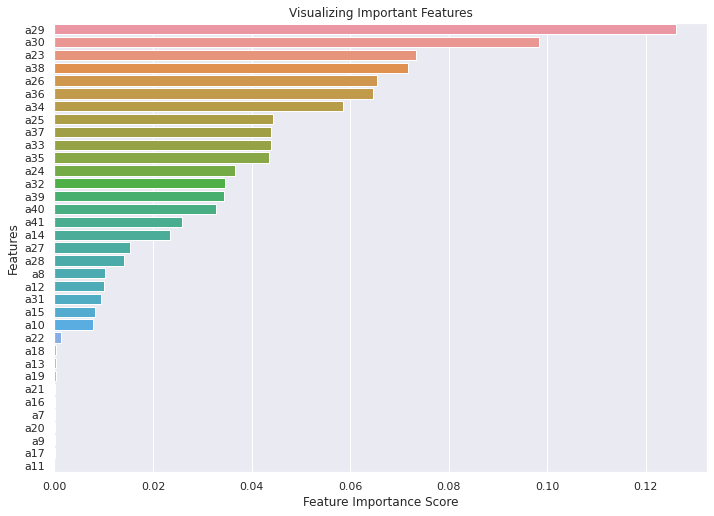

In [39]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(x=feat_score, y=feat_score.index, orient='h')



# Add labels to the graph

plt.xlabel('Feature Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Important Features")



# Visualize the graph

plt.show()






In [44]:
#define feature vector and target 

X1 = df2[['a29','a30','a23','a38','a26']]
y1 = df2['a42']


In [45]:
#split data into train and test 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.33, random_state = 15)

In [49]:
#create classifier 
top5rf = RandomForestClassifier(random_state=0)

#fit the model 
top5rf.fit(X1_train,y1_train)

#prediction 
y1_prediction = top5rf.predict(X1_test)

#accuracy score 
accuracy_score(y1_test,y1_prediction)

0.8972816935289872

Accuracy with top 5 features is 89%. 

In [50]:
#define feature vector and target 

X2 = df2[['a29','a30','a23','a38','a26','a36','a34','a25']]
y2 = df2['a42']

In [51]:
#split data into train and test 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.33, random_state = 15)

In [52]:
#create classifier 
top8rf = RandomForestClassifier(random_state=0)

#fit the model 
top8rf.fit(X2_train,y2_train)

#prediction 
y2_prediction = top8rf.predict(X2_test)

#accuracy score 
accuracy_score(y2_test,y2_prediction)

0.9425066153476065

Accuracy with top 8 features is 94% 

In [53]:
#define feature vector and target 

X3 = df2[['a29','a30','a23','a38','a26','a36','a34','a25','a37','a33']]
y3 = df2['a42']

In [54]:
#split data into train and test 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size = 0.33, random_state = 15)

In [55]:
#create classifier 
top10rf = RandomForestClassifier(random_state=0)

#fit the model 
top10rf.fit(X3_train,y3_train)

#prediction 
y3_prediction = top10rf.predict(X3_test)

#accuracy score 
accuracy_score(y3_test,y3_prediction)

0.9680057733942747

Accuracy with top 10 features is 96% 

In [56]:
#define feature vector and target 

X4 = df2[['a29','a30','a23','a38','a26','a36','a34','a25','a37','a33','a35','a24','a32']]
y4 = df2['a42']

In [57]:
#split data into train and test 
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size = 0.33, random_state = 15)

In [58]:
#create classifier 
top13rf = RandomForestClassifier(random_state=0)

#fit the model 
top13rf.fit(X4_train,y4_train)

#prediction 
y4_prediction = top13rf.predict(X4_test)

#accuracy score 
accuracy_score(y4_test,y4_prediction)

0.9765455857589608

Accuracy with top 13 is 97%. 

In [68]:
#define feature vector and target 

X5 = df2[['a29','a30','a23','a38','a26','a36','a34','a25','a37','a33','a35','a24','a32','a39','a40','a41','a14','a27','a28','a8','a12']]
y5 = df2['a42']


#split data into train and test 
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size = 0.33, random_state = 15)



#create classifier 
top21rf = RandomForestClassifier(random_state=0, oob_score= True)

#fit the model 
top21rf.fit(X5_train,y5_train)

#prediction 
y5_prediction = top21rf.predict(X5_test)

#accuracy score 
accuracy_score(y5_test,y5_prediction)

0.9906182343035843

Accuracy with the top 21 is 99% which is close to the accuracy with all the features. 

In [64]:
#define feature vector and target 

X6 = df2[['a29','a30','a23','a38','a26','a36','a34','a25','a37','a33','a35','a24','a32','a39','a40','a41','a14','a27','a28','a8']]
y6 = df2['a42']


#split data into train and test 
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size = 0.33, random_state = 15)



#create classifier 
top20rf = RandomForestClassifier(random_state=0, oob_score= True)

#fit the model 
top20rf.fit(X6_train,y6_train)

#prediction 
y6_prediction = top20rf.predict(X6_test)

#accuracy score 
accuracy_score(y6_test,y6_prediction)

0.9900168390666346

Accuracy with top 20 is 99% 

In [63]:
from numpy.ma import true_divide
#define feature vector and target 

X7 = df2[['a29','a30','a23','a38','a26','a36','a34','a25','a37','a33','a35','a24','a32','a39','a40','a41','a14','a27','a28']]
y7 = df2['a42']


#split data into train and test 
X7_train, X7_test, y7_train, y7_test = train_test_split(X7, y7, test_size = 0.33, random_state = 15)



#create classifier 
top19rf = RandomForestClassifier(random_state=0, oob_score =True)

#fit the model 
top19rf.fit(X7_train,y7_train)

#prediction 
y7_prediction = top19rf.predict(X7_test)

#accuracy score 
accuracy_score(y7_test,y7_prediction)
top19rf.oob_score_

0.9859580519018841

Accuracy with top 19 features is 98.6 % , The optimal number of features is the top 20 - 21 features 21 were slighly more accurate by a very small amount both of them rounding to 99%. 

# Out of bag scores 

In [66]:
#out of bag error score for top 20 features 
top20rf.oob_score_

0.9885057471264368

In [69]:
#out of bag error score for top 21 features 
top21rf.oob_score_

0.9904609550894655

In [70]:
#out of bag error score for original data set with all features 
lrf.oob_score_

0.9904609550894655

The out of bag error score for the top 21 features is the same as out of bag error score for the original dataset using all the features. 

# Random Forest Conclusion 

Using the top 21 features based on the feature score as a subset provides similar accuracy to using all the features from the entire dataset as evidenced by the accuracy score and Out of the bag error score. 